In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import r2_score, mean_squared_error
import time

Importing Dataset

In [2]:
LON_listings = pd.read_csv('listings.csv')
LON_listings.head(3)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13913,https://www.airbnb.com/rooms/13913,20211207182339,2021-12-09,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,https://www.airbnb.com/users/show/54730,...,4.90,4.65,4.75,NaN,f,2,1,1,0,0.16
1,15400,https://www.airbnb.com/rooms/15400,20211207182339,2021-12-09,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,https://www.airbnb.com/users/show/60302,...,4.82,4.93,4.73,NaN,f,1,1,0,0,0.61
2,17402,https://www.airbnb.com/rooms/17402,20211207182339,2021-12-09,Superb 3-Bed/2 Bath & Wifi: Trendy W1,You'll have a wonderful stay in this superb mo...,"Location, location, location! You won't find b...",https://a0.muscache.com/pictures/39d5309d-fba7...,67564,https://www.airbnb.com/users/show/67564,...,4.66,4.85,4.59,NaN,f,1,1,0,0,0.33


# Cleaning and Preprocessing of Data

As we are not using NLP for this project, free text columns will be dropped , as will other columns which are not useful for predicting price
#(e.g. url, host name and other host-related features that are unrelated to the property).

In [3]:
cols_to_drop = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview', 
                'picture_url', 'host_id', 'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url',
                'host_picture_url', 'host_neighbourhood', 'host_verifications', 'calendar_last_scraped']
df = LON_listings.drop(cols_to_drop, axis=1)

#'summary' 'space' 'notes' 'transit' 'access' 'interaction' 'house_rules'\n 'thumbnail_url' 'medium_url' 'xl_picture_url

Checking if there are several na values in a column

In [4]:
df.isna().sum()

id                                                  0
host_since                                         59
host_response_time                              34334
host_response_rate                              34334
host_acceptance_rate                            32993
host_is_superhost                                  59
host_listings_count                                59
host_total_listings_count                          59
host_has_profile_pic                               59
host_identity_verified                             59
neighbourhood                                   26673
neighbourhood_cleansed                              0
neighbourhood_group_cleansed                    66641
latitude                                            0
longitude                                           0
property_type                                       0
room_type                                           0
accommodates                                        0
bathrooms                   

In [5]:
df.drop(['neighbourhood_group_cleansed','calendar_updated','license'], axis=1, inplace=True)

In [6]:
print(sum((df.host_listings_count == df.host_total_listings_count) == False))
df.loc[((df.host_listings_count == df.host_total_listings_count) == False)][:5]

59


,id,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
110,116268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.00,5.00,4.75,4.93,f,1,0,1,0,0.27
3091,3552939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.00,5.00,5.00,5.00,f,1,1,0,0,0.05
3455,3983143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.00,4.91,5.00,4.91,f,1,1,0,0,0.15
3968,4627239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.86,4.86,4.71,4.71,f,1,1,0,0,0.16
4740,5462756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.92,4.95,4.72,4.82,f,2,1,1,0,1.45


host_listings_count and host_total_listings_count are the same in all but 59 cases.
These cases are those where the value is NaN. Therefore one of these columns can be dropped.
Other columns which split these into type of property will also be dropped, as they will be highly correlated 
(one will be the total of the others).

In [7]:
df.drop(['calculated_host_listings_count', 
         'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 
         'calculated_host_listings_count_shared_rooms'], axis=1, inplace=True)

There are multiple columns for minimum and maximum night stays, 
but the two main ones will be used as there are few differences between e.g. minimum_nights and minimum_minimum_nights.
The latter presumably refers to the fact that min/max night stays can vary over the year. 
The default (i.e. most frequently applied) min/max night stay values will be used instead.

In [8]:
sum((df.minimum_nights == df.minimum_minimum_nights) == False)

5173

In [9]:
df.drop(['minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 
         'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], axis=1, inplace=True)

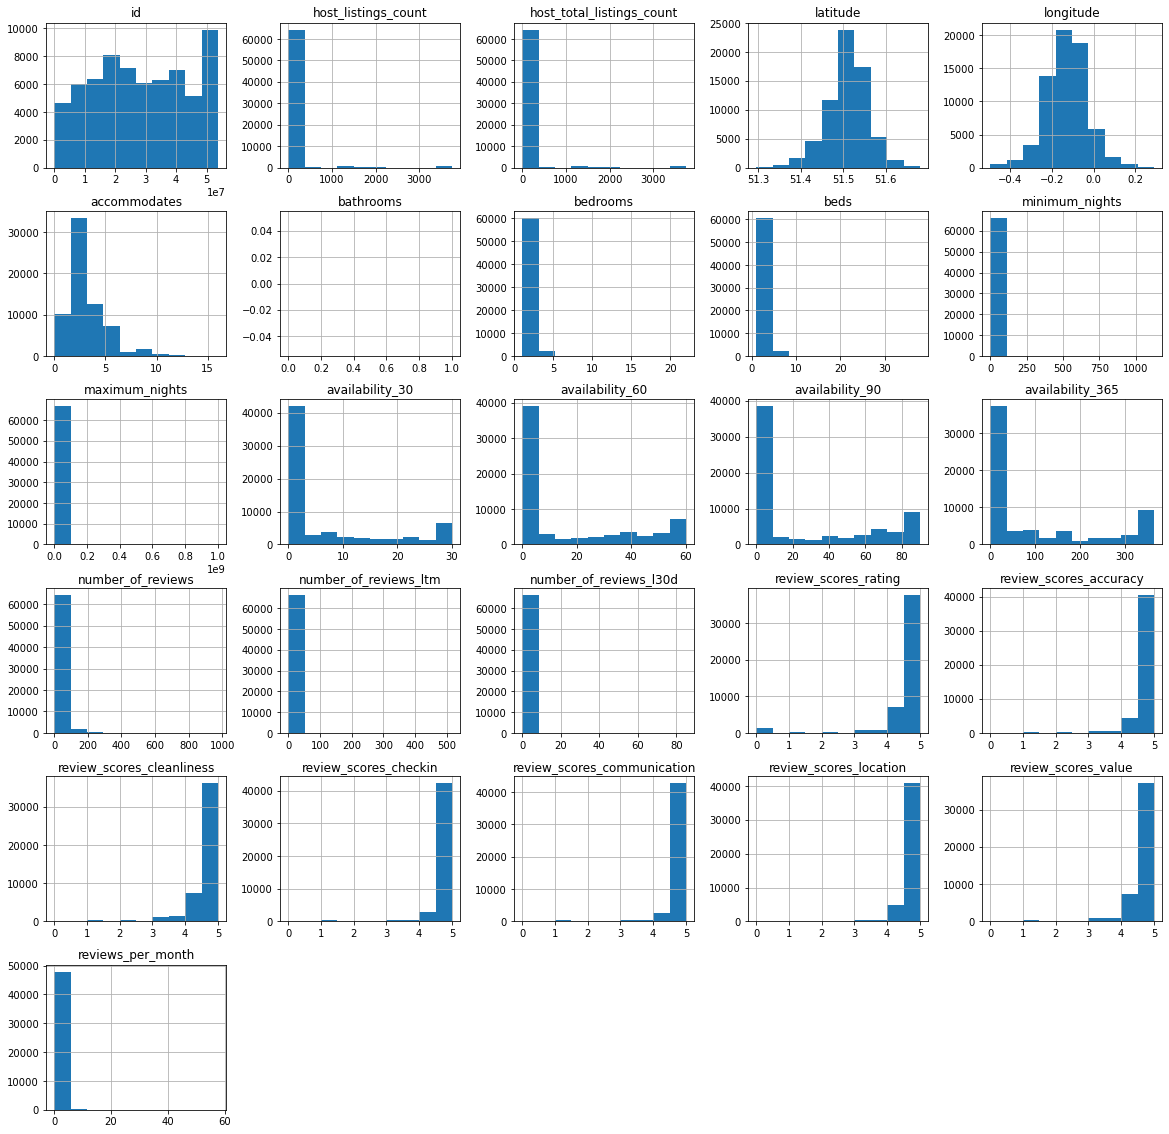

In [10]:
# Plotting the distribution of numerical and boolean categories
df.hist(figsize=(20,20));

since host response time and rate are related, removing host_response_time time column.

In [11]:
df.drop(['host_response_time'], axis=1, inplace=True)

There are multiple different measures of availability, which will be highly correlated with each other. Only one will 
be retained, availability for 90 days (availability_90). This is due to the seemingly inevitable enforcement of
London-like regulations proposed by the Scottish Government (90 days per year rents) after significant and growing concern
from local residents and housing organisations over the increase of Airbnb and other short term lets within Edinburgh city,
where there is now one Airbnb listing for every 11 residents.

In [12]:
df.drop(['availability_30', 'availability_60', 'availability_365'], axis=1, inplace=True)

### Review Rating Column

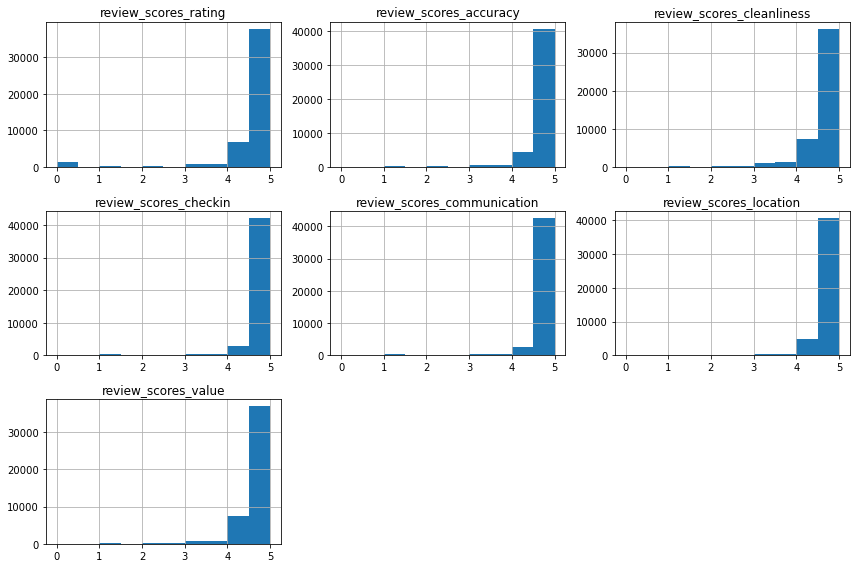

In [13]:
# Checking the distributions of the review ratings columns
variables_to_plot = list(df.columns[df.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    df[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

### number_of_reviews_ltm and reviews_per_month

These will be highly correlated with number_of_reviews and so will be dropped.

In [14]:
df.drop(['number_of_reviews_ltm', 'reviews_per_month','number_of_reviews_l30d'], axis=1, inplace=True)

# Modelling

C:\Users\ASUS\AppData\Local\Temp/ipykernel_12960/1066291845.py:14: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


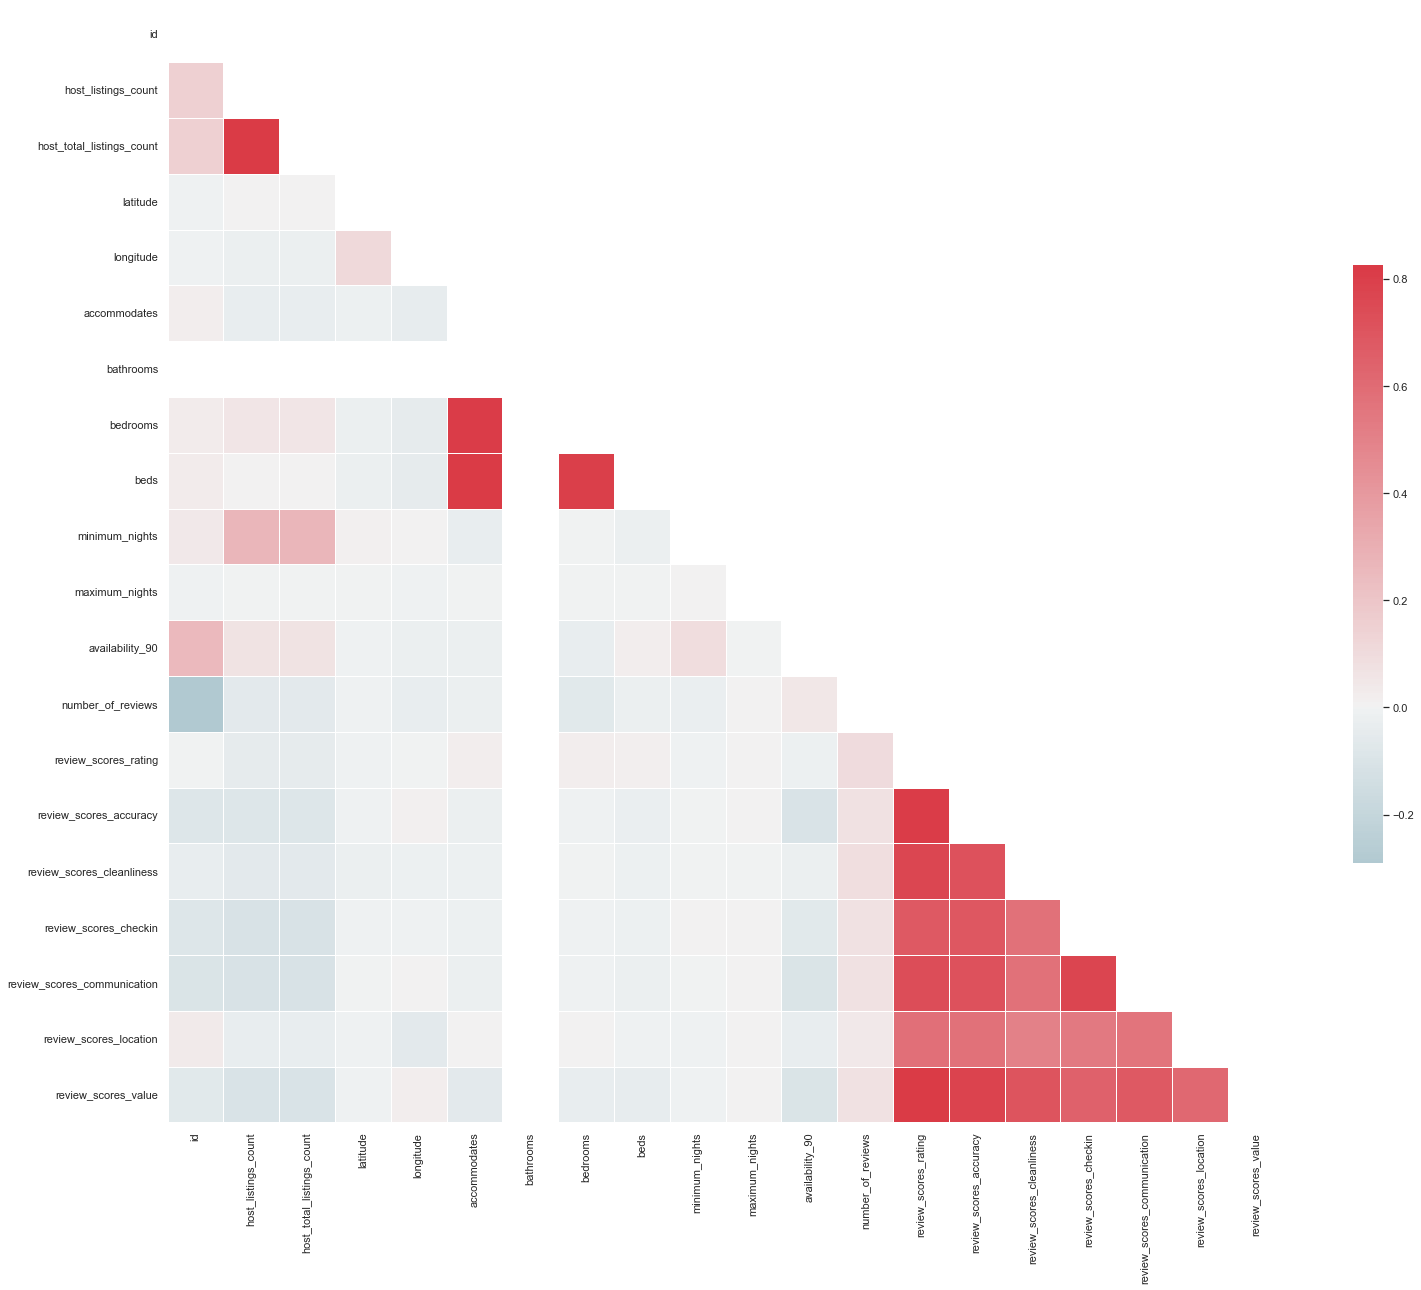

In [16]:
multi_collinearity_heatmap(df.drop(list(df.columns[df.columns.str.startswith('Neighbourhood')]), axis=1), figsize=(25,22))

In [15]:
def multi_collinearity_heatmap(df, figsize=(11,9)):
    
    """
    Creates a heatmap of correlations between features in the df. A figure size can optionally be set.
    """
    
    # Set the style of the visualization
    sns.set(style="white")

    # Create a covariance matrix
    corr = df.corr()

    # Generate a mask the size of our covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max());

# Cleansing

In [17]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.fillna(0)

In [18]:
#LA_listings[~LA_listings.isin([np.nan]).any(1)]
df[:] = np.nan_to_num(df)

In [19]:
#clean the data by removing $ and change the data type to float
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].astype(float)

#Based on EDA, we'll consider the listings $500 and below $500 above and $0 are considered as outliers for models.
df = df.loc[(df.price <= 500) & (df.price > 0)]

C:\Users\ASUS\AppData\Local\Temp/ipykernel_12960/4239704309.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$', '')


In [20]:
#Clean the data by removing unecessary character such as [{}]
df.amenities = df.amenities.str.replace("[{}]", "").str.replace('"', "")
df.amenities.head()

C:\Users\ASUS\AppData\Local\Temp/ipykernel_12960/2891338035.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df.amenities = df.amenities.str.replace("[{}]", "").str.replace('"', "")


0    [Hot water, Heating, Coffee maker, Building st...
1    [Hot water, Heating, Coffee maker, TV with sta...
2    [Hot water, Heating, Coffee maker, Iron, Dryer...
3    [Shampoo, Carbon monoxide alarm, Hot water, He...
4    [Shampoo, Washer, Heating, Coffee maker, Essen...
Name: amenities, dtype: object

In [21]:
# convert categorical data into a matrix of token counts

from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer =  CountVectorizer(tokenizer=lambda x: x.split(','))
amenities = count_vectorizer.fit_transform(df['amenities'])
df_amenities = pd.DataFrame(amenities.toarray(), columns=count_vectorizer.get_feature_names())
#df_amenities = df_amenities.drop('',1)

In [22]:
columns =  ['host_is_superhost', 
            'host_identity_verified',
            'host_has_profile_pic',
            #'is_location_exact',
            #'requires_license',
            'instant_bookable']
            #'require_guest_profile_picture', 
            #'require_guest_phone_verification']

In [23]:
# f(false) means not available, t(true) means available. 
# convert not available(f) to 0 
# available (t) to 1

for i in columns:
    df[i] = df[i].replace('f',0,regex=True)
    df[i] = df[i].replace('t',1,regex=True)

In [54]:
# Numeric features
df_model = df[['host_is_superhost', 
                         'host_identity_verified',
                         'host_has_profile_pic',
                         #'is_location_exact', 
                         #'requires_license', 
                         'instant_bookable', 
                         #'require_guest_profile_picture', 
                         #'require_guest_phone_verification', 
                         #'security_deposit', 'cleaning_fee', 
                         'host_listings_count', 
                         'host_total_listings_count', 
                         'minimum_nights',
                         #'bathrooms', 
                         'bedrooms', 
                         #'guests_included',
                         'number_of_reviews',
                         'review_scores_rating', 
                         'price']]

df_model.head()

,host_is_superhost,host_identity_verified,host_has_profile_pic,instant_bookable,host_listings_count,host_total_listings_count,minimum_nights,bedrooms,number_of_reviews,review_scores_rating,price
0,0,1,1,0,3.0,3.0,1,1.0,22,4.86,65.0
1,0,1,1,0,1.0,1.0,3,1.0,89,4.79,75.0
2,0,1,1,0,18.0,18.0,4,3.0,43,4.69,265.0
3,0,1,1,0,3.0,3.0,3,1.0,0,0.00,150.0
4,0,1,1,1,3.0,3.0,10,1.0,129,4.78,29.0


In [55]:
#replace the missing values in the numeric features with median

for col in df_model.columns[df_model.isnull().any()]:
    df_model[col] = df_model[col].fillna(df_model[col].median())

In [56]:
#categorical features
for cat_feature in ['property_type', 'room_type', 'neighbourhood_cleansed']:
    df_model = pd.concat([df_model, pd.get_dummies(df[cat_feature])], axis=1)

In [57]:
df_model = pd.concat([df_model, df_amenities], axis=1, join='inner')
df_model.head()

,host_is_superhost,host_identity_verified,host_has_profile_pic,instant_bookable,host_listings_count,host_total_listings_count,minimum_nights,bedrooms,number_of_reviews,review_scores_rating,...,[waterfront,[wifi,[wifi \u2013 43 mbps,[wifi],[wow shampoo,[zanussi refrigerator,[zanussi stainless steel electric stove,hypoallergenic body soap,kettle,microwave
0,0,1,1,0,3.0,3.0,1,1.0,22,4.86,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,1.0,1.0,3,1.0,89,4.79,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,18.0,18.0,4,3.0,43,4.69,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,3.0,3.0,3,1.0,0,0.00,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,1,3.0,3.0,10,1.0,129,4.78,...,0,0,0,0,0,0,0,0,0,0


In [73]:
df['price'] = np.log(df['price'])

In [74]:
from sklearn.model_selection import train_test_split
y = df_model['price']
x = df_model.drop('price', axis =1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)

In [75]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

dt = DecisionTreeRegressor(random_state=1)           
dt.fit(X_train, y_train)
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)
rmse_dt= (mean_squared_error(y_test,y_test_pred))**(1/2)

print('RMSE test: %.3f' % rmse_dt)
print('R^2 test: %.3f' % (r2_score(y_test, y_test_pred)))

RMSE test: 77.821
R^2 test: 0.167


In [38]:
#coefficent 
coefs_df_dt = pd.DataFrame()
coefs_df_dt['Features Importance'] = X_train.columns
coefs_df_dt['Coefficient'] = dt.feature_importances_
coefs_df_dt.sort_values('Coefficient', ascending=False).head(10)

,Features Importance,Coefficient
7,bedrooms,0.305724
5,host_total_listings_count,0.085754
102,Entire home/apt,0.078686
8,number_of_reviews,0.034224
6,minimum_nights,0.027170
4,host_listings_count,0.025391
138,Westminster,0.025337
9,review_scores_rating,0.019823
125,Kensington and Chelsea,0.018506
29,Entire serviced apartment,0.008742


<AxesSubplot:>

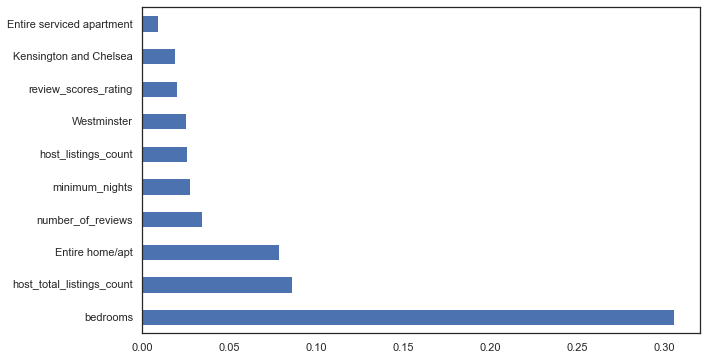

In [39]:
feat_imp_dt = pd.Series(dt.feature_importances_, index=X_train.columns)
feat_imp_dt.nlargest(10).plot(kind='barh', figsize=(10,6))

In [80]:
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(n_estimators=500, criterion='mse', random_state=3, n_jobs=-1)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
rmse_rf= (mean_squared_error(y_test,y_test_pred))**(1/2)

print('RMSE test: %.3f' % rmse_rf)
print('R^2 test: %.3f' % (r2_score(y_test, y_test_pred)))



RMSE test: 56.514
R^2 test: 0.561


In [82]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
cnf_matrix

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [79]:
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

Accuracy: 0.04600515463917526


In [ ]:
coefs_df = pd.DataFrame()
coefs_df['Features Importance'] = X_train.columns
coefs_df['Coefficient'] = rf.feature_importances_
coefs_df.sort_values('Coefficient', ascending=False).head(10)

In [ ]:
feat_imp_rf = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_imp_rf.nlargest(10).plot(kind='barh', figsize=(10,6))

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics


lr = LogisticRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
rmse_lr= (mean_squared_error(y_test,y_test_pred))**(1/2)

print('RMSE test: %.3f' % rmse_lr)
print('R^2 test: %.3f' % (r2_score(y_test, y_test_pred))) 

# RMSE test: 71.019
# R^2 test: 0.400

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RMSE test: 90.192
R^2 test: -0.118


In [65]:
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))


Accuracy: 0.04600515463917526


In [68]:

from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(pred)

[ 89.         410.33333333  41.         ... 315.          65.33333333
  49.66666667]


In [69]:
y_test_pred = knn.predict(X_test)
rmse_knn= (mean_squared_error(y_test,y_test_pred))**(1/2)

In [70]:
rmse_knn

71.07740107103382

In [81]:
df.columns

AttributeError: 'Index' object has no attribute 'count'